In [1]:
import pandas as pd

df = pd.DataFrame(pd.read_csv('../data/SanFrancisco_salary_dirty.csv'),
                  columns=['JobTitle', 'Department', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay'])

df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay
count,111881.000000,111881.000000,111881.000000,111881.000000,111881.000000
mean,67208.464335,5266.537354,3655.130550,25114.682525,76130.132232
std,43417.695515,11764.757612,8038.765165,15372.746237,51269.839386
min,-166.010000,-0.010000,0.000000,-13.800000,0.000000
25%,33644.660156,0.000000,0.000000,12145.089844,37041.430000
50%,65547.040000,0.000000,820.840000,28698.490234,72630.700000
75%,95229.030000,4865.720000,4307.970215,35608.770000,107533.480000
max,319275.010000,220909.480000,342802.630000,96570.660000,471952.640000


In [2]:
df = pd.DataFrame(pd.read_csv('../data/SanFrancisco_salary_dirty.csv', delimiter=','),
                  columns=['JobTitle', 'Department', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay'])


df[df.OvertimePay < 0] = 0
df[df.Benefits < 0] = 0
df = df[df.Department != 0]

all_depts = df['Department'].unique()
for dept in all_depts:
    dept_mean = df[(df.Department == dept) & (df.BasePay >= 12 * 2720)]['BasePay'].mean()
    df.loc[(df.Department == dept) & (df.BasePay < 12 * 2720), 'BasePay'] = dept_mean

df['TotalPay'] = df.apply(lambda row: row['BasePay'] + row['OvertimePay'] + row['OtherPay'] + row['Benefits'], axis=1)

df.to_csv('../data/SanFrancisco_salary_clean.csv')
df.describe()


,BasePay,OvertimePay,OtherPay,Benefits,TotalPay
count,111879.000000,111879.000000,111879.000000,111879.000000,111879.000000
mean,85482.970594,5266.631501,3655.092817,25114.873611,119519.568523
std,29265.204602,11764.841695,8038.812208,15372.695982,46195.387337
min,32640.300000,0.000000,0.000000,0.000000,33044.390000
25%,65400.405000,0.000000,0.000000,12145.370117,86032.293025
50%,82697.748853,0.000000,820.790000,28698.490234,103694.440000
75%,95229.030000,4865.870000,4307.550049,35608.775000,143171.180000
max,319275.010000,220909.480000,342802.630000,96570.660000,510732.680000


In [3]:
df.quantile(0.1)

/var/folders/r7/kp46shb15q31g148xwp091jh0000gn/T/ipykernel_3121/3987576084.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(0.1)


BasePay        52168.714000
OvertimePay        0.000000
OtherPay           0.000000
Benefits         206.239999
TotalPay       80702.434000
Name: 0.1, dtype: float64

In [4]:
df.quantile(0.9)

/var/folders/r7/kp46shb15q31g148xwp091jh0000gn/T/ipykernel_3121/248432318.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(0.9)


BasePay        122621.030
OvertimePay     16912.912
OtherPay        10767.294
Benefits        41598.390
TotalPay       186147.982
Name: 0.9, dtype: float64

In [10]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

q3 - q1

/var/folders/r7/kp46shb15q31g148xwp091jh0000gn/T/ipykernel_3121/3058336896.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(0.25)
/var/folders/r7/kp46shb15q31g148xwp091jh0000gn/T/ipykernel_3121/3058336896.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(0.75)


BasePay        29828.625000
OvertimePay     4865.870000
OtherPay        4307.550049
Benefits       23463.404883
TotalPay       57138.886975
dtype: float64

In [5]:
df['OtherPay'].corr(df['TotalPay'])

0.4738587347958158

In [6]:
df['TotalPay'].corr(df['Benefits'])

0.7347010670274019

In [7]:
df['OvertimePay'].corr(df['Benefits'])

0.2996627006803852

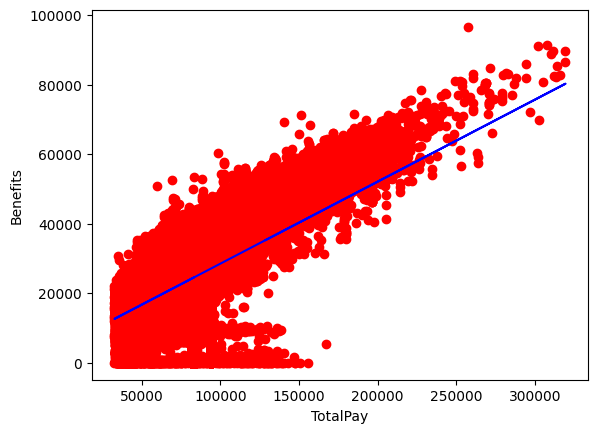

In [23]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df[["BasePay"]]
y = df[["Benefits"]]

regressor = LinearRegression()
regressor.fit(X, y)

_pred = regressor.predict(X)

plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.xlabel('BasePay')
plt.ylabel('Benefits')
plt.show()

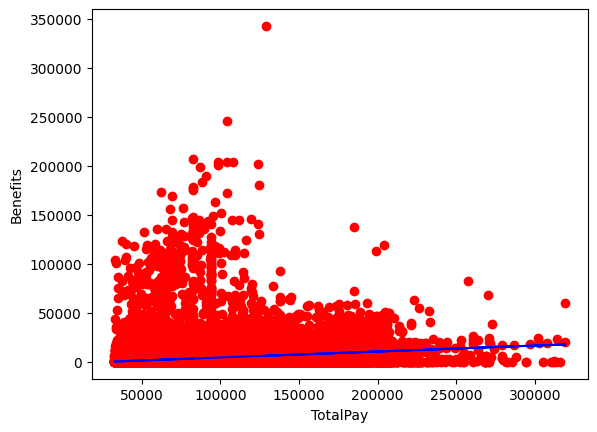

In [24]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df[["BasePay"]]
y = df[["OtherPay"]]

regressor = LinearRegression()
regressor.fit(X, y)

_pred = regressor.predict(X)

plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.xlabel('BasePay')
plt.ylabel('OtherPay')
plt.show()

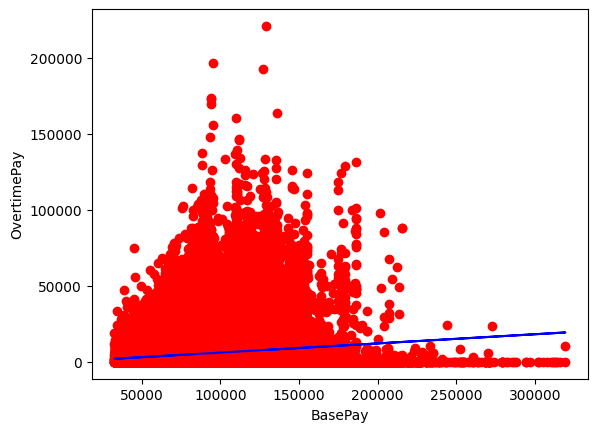

In [25]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df[["BasePay"]]
y = df[["OvertimePay"]]

regressor = LinearRegression()
regressor.fit(X, y)

_pred = regressor.predict(X)

plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.xlabel('BasePay')
plt.ylabel('OvertimePay')
plt.show()